In [22]:
# Calculate boolean statistics
import pandas as pd
movie=pd.read_csv('data/movie.csv',index_col='movie_title')
movie_longer_than_2_hours=movie['duration']>120
movie_longer_than_2_hours.sum()
movie['duration'].dropna().gt(120).mean()  
#gt >  ge >=  lt< le<= eq=
movie_longer_than_2_hours.value_counts(normalize=True)
# the percentage of movies that have actor 1 with more Facebook likes than actor 2
actors=movie[['actor_1_facebook_likes','actor_2_facebook_likes']].dropna()
(actors['actor_1_facebook_likes']>actors['actor_2_facebook_likes']).mean()

0.9777687130328371

In [33]:
#Constructing multiple boolean conditions
#and: &    or:\   not:~
criteria1=movie.imdb_score>8
criteria2=movie.content_rating=='PG-13'
criteria3=((movie.title_year<2000)|(movie.title_year>2009))
criteria2.head()
criteria_final=criteria1&criteria2&criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [47]:
#Filter with boolean indxing
criteria4=movie.imdb_score<5
criteria5=movie.content_rating=='R'
criteria6=((movie.title_year>=2000)|(movie.title_year<=2010))
criteria_final_a=criteria4&criteria5&criteria6
final_crit_all=criteria_final|criteria_final_a
movie[final_crit_all]

#filter both rows and column
cols=['imdb_score','content_rating','title_year']
movie_filtered=movie.loc[final_crit_all,cols]
movie_filtered.head(10)


,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
The Lovers,4.5,R,2015.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0


In [61]:
#Replicate boolean indexing with index selection
college=pd.read_csv('data/college.csv')
college[college['STABBR']=='TX'].head()  #boolean indexing

college2=college.set_index('STABBR')
college2.loc['TX'].head(5)

states=['TX','CA','NY']
college2.loc[states]
college[college['STABBR'].isin(states)]

Index(['AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL',
       ...
       'TX', 'TX', 'TX', 'CA', 'TX', 'CA', 'KS', 'OH', 'CA', 'TX'],
      dtype='object', name='STABBR', length=7535)

In [80]:
#Selecting with unique and sorted indexes
college_a=pd.read_csv('data/college.csv',index_col='STABBR')
college_a.index.is_monotonic #check whether the index is sorted
college_b=college_a.sort_index()#after sort, the index  power quick

#%timeit college_a[college_a.index=='TX']
#%timeit college_a.loc['TX']
#%timeit college_b.loc['TX']

college_c=college_a.set_index('INSTNM')
college_c.index.is_unique

college_d=pd.read_csv('data/college.csv')
college_d.loc[:,'INSTNM']



0                                Alabama A & M University
1                     University of Alabama at Birmingham
2                                      Amridge University
3                     University of Alabama in Huntsville
4                                Alabama State University
5                               The University of Alabama
6                       Central Alabama Community College
7                                 Athens State University
8                         Auburn University at Montgomery
9                                       Auburn University
10                            Birmingham Southern College
11                 Chattahoochee Valley Community College
12                              Concordia College Alabama
13                            South University-Montgomery
14                     Enterprise State Community College
15               James H Faulkner State Community College
16                                    Faulkner University
17            

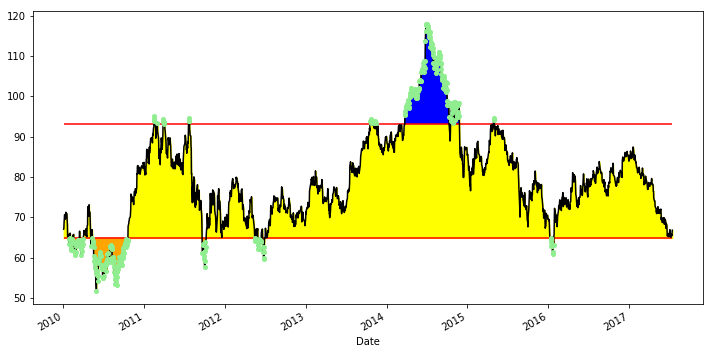

In [81]:
#Gaining Perspective on stock prices
import pandas as pd
import matplotlib.pyplot as plt
slb=pd.read_csv('data/slb_stock.csv',index_col='Date',parse_dates=['Date'])
slb.head(5)
slb_close=slb['Close']
slb_summary=slb_close.describe(percentiles=[.1,.9])

upper_10=slb_summary.loc['90%']
lower_10=slb_summary.loc['10%']
criteria=(slb_close<lower_10)|(slb_close>upper_10)
slb_top_bottom_10=slb_close[(slb_close<lower_10)|(slb_close>upper_10)]

slb_close.plot(color='black',figsize=(12,6))
slb_top_bottom_10.plot(marker='o',style=' ',markersize=4,color='lightgreen') #marker用来表示点的形状，style设置成空，点之间就不会连接起来

xmin=criteria.index[0]
xmax=criteria.index[-1]
plt.hlines(y=[upper_10,lower_10],xmin=xmin,xmax=xmax,color='red')
 
plt.fill_between(x=criteria.index,y1=lower_10,y2=slb_close.values,color='yellow')  #就是(x,y1)与（x,y2）的交集
plt.fill_between(x=criteria.index,y1=lower_10,y2=slb_close.values,where=slb_close<lower_10,color='orange')
plt.fill_between(x=criteria.index,y1=upper_10,y2=slb_close.values,where=slb_close>upper_10,color='blue')

In [80]:
#Translate SQL WHERE clauses
#SELECT UNIQUE_ID, DEPARTMENT, GENDER, BASE_SALARY
#FROM EMPLOYEE
#WHERE DEPARTMENT IN ('Houston Police Department-HPO','Houston Fire Department (HFD)')AND G
#      GENDER='Female' AND BASE_SALARY BETWEEN 80000 AND 120000;

employee=pd.read_csv('data/employee.csv')
employee.BASE_SALARY.describe().astype(int)

depets=['Houston Police Department-HPD','Houston Fire Department (HFD)']
condition1=employee.DEPARTMENT.isin(depets)
condition2=employee.GENDER=='Female'
condition3=(employee.BASE_SALARY between 
condition_final=condition1&condition2&condition3
select_columns=['UNIQUE_ID','DEPARTMENT','GENDER','BASE_SALARY']
employee.loc[condition_final,select_columns]

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0
564,564,Houston Police Department-HPD,Female,81239.0
595,595,Houston Police Department-HPD,Female,99953.0
937,937,Houston Police Department-HPD,Female,81239.0
954,954,Houston Police Department-HPD,Female,91181.0
1118,1118,Houston Police Department-HPD,Female,104455.0


0.742 fall within 1 standard deviation. 0.946 within 2 and 0.986 within 3


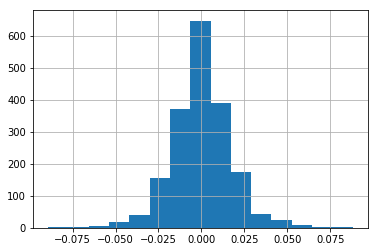

In [4]:
#Determining the normality of stock market returns
import pandas as pd
def test_return_normality(stock_date):
    close=stock_date['Close']
    daily_return=close.pct_change()
    daily_return=daily_return.dropna()
    daily_return.hist(bins=15) #bin是指箱子的个数，就是有几条柱状图
    mean=daily_return.mean()
    std=daily_return.std()
#DataFrame.sub(other, axis='columns', level=None, fill_value=None), Equivalent to dataframe - other
#DataFrame.div(other, axis='columns', level=None, fill_value=None), Equivalent to dataframe / other
    abs_z_score=abs(daily_return-mean)/std   #daily_return.sub(mean).abs().div(std)
    pcts=[abs_z_score.lt(i).mean() for i in range (1,4)] #lt=less
#https://docs.python.org/3.7/tutorial/inputoutput.html#the-string-format-method 
#Input and Output
    print('{:.3f} fall within 1 standard deviation. {:.3f} within 2 and {:.3f} within 3'.format(*pcts))

slb=pd.read_csv('data/slb_stock.csv',index_col='Date',parse_dates=['Date'])
test_return_normality(slb)

In [121]:
#Improving readability of boolean indexing with the query method
top10_depts=employee.DEPARTMENT.value_counts().index[:10].tolist()
qs="DEPARTMENT not in @top10_depts and GENDER=='Female'"
employee_filter=employee.query(qs)
select_columns=['UNIQUE_ID','BASE_SALARY','DEPARTMENT','GENDER']
employee_filter[select_columns]

,UNIQUE_ID,BASE_SALARY,DEPARTMENT,GENDER
0,0,121862.0,Municipal Courts Department,Female
73,73,55939.0,Human Resources Dept.,Female
96,96,59077.0,City Controller's Office,Female
117,117,90957.0,Legal Department,Female
146,146,74951.0,Houston Information Tech Svcs,Female
149,149,64251.0,City Controller's Office,Female
176,176,32386.0,Dept of Neighborhoods (DON),Female
197,197,84456.0,Houston Emergency Center (HEC),Female
211,211,42432.0,Houston Emergency Center (HEC),Female
216,216,37274.0,Human Resources Dept.,Female


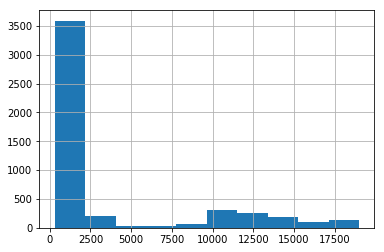

In [141]:
#Perserving Series with the where method
movie=pd.read_csv('data/movie.csv',index_col='movie_title')
fb_likes=movie['actor_1_facebook_likes'].dropna().astype(int)
fb_likes
#fb_likes.hist()
criteria_high=fb_likes<20000
criteria_low=fb_likes>300
criteria_high.mean().round(2) # 91% the movies have less than 20000
fb_likes.where(criteria_high).head() #use all missing values replace FALSE
fb_likes.where(criteria_high,other=2000).head() #repalce all missing values with 2000
fb_likes_cap=fb_likes.where(criteria_high,other=2000).where(criteria_low,other=300)
#len(fb_likes_cap)=len(fb_likes)
fb_likes_cap.hist()

#fb_like_cap2=fb_likes.clip(lower=300,upper=2000) this is equal to fb_like_cap

In [142]:
#Masking DataFrame rows
c1=movie['title_year']>=2010
c2=movie['title_year'].isnull()
condition=c1|c2
movie.mask(condition).head() #所有符合的ROWS都会被变为NAN
movie.mask(condition).dropna（how='all'） #remove rows are all NAN

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
#Select with booleans, integer location and labels
import numpy as np
c1=movie['content_rating']=='G'
c2=movie['imdb_score']<4
condition=c1&c2

movie_loc=movie.loc[condition]
movie_loc.equals(movie[condition])

movie_iloc=movie.iloc[condition.values]
movie_iloc.equals(movie_loc)

criteria_col=movie.dtypes==np.int64 #it is a series
criteria_col.head()
movie.loc[:,criteria_col].head()
movie.iloc[:,criteria_col.values].head()

cols=['content_rating','imdb_score','title_year','gross']
movie.loc[condition,cols].sort_values('imdb_score')

col_index=[movie.columns.get_loc(col)for col in cols]
col_index
movie.iloc[condition.values,col_index]

,content_rating,imdb_score,title_year,gross
movie_title,,,,
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
